In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 3.6.5 - Mechanical Example of imperfect bifurcation and catastrophe.

<img src="3.6.5.png"> 

a.) At equilibrium, there is a balance between the forces along the wire. The forces taking place are the projected gravitational force $mg \sin \theta$ and the spring force along the direction of the wire, assuming there is no dissipative forces.<br>
The projection of the gravitational force is of the form $mg \sin \theta$ and the projection of the spring force is of the form $k(x - L_0 \cos \phi) = k(x -  \frac{xL_0}{\sqrt{a^2 + x^2}})$. Equating these 2 forces, we get 
$$mg \sin \theta = kx(1 -  \frac{L_0}{\sqrt{a^2 + x^2}})$$

b.) To arrive at the dimensionless form of the above equilibrium equation, we first divide both sides by $kx$
$$1 -  \frac{L_0}{\sqrt{a^2 + x^2}} = \frac{mg \sin \theta}{kx}$$
We then rearrange, getting
$$1 - \frac{mg \sin \theta}{kx} =  \frac{L_0}{\sqrt{a^2 + x^2}}$$
To get the 1 inside the squre root, we divide by $a^2$ inside the squre root
$$1 - \frac{mg \sin \theta}{kx} =  \frac{L_0}{a\sqrt{1 + \frac{x^2}{a^2}}}$$
The dimensionless parameter u seems to be equal to $\frac{x}{a}$. We divide and multiply the first term by a, finally getting
$$1 - \frac{mg \sin \theta}{ka \frac{x}{a}} =  \frac{L_0}{a\sqrt{1 + \frac{x^2}{a^2}}}$$
Taking $u = \frac{x}{a}$, $R = \frac{L_0}{a}$, and $h = \frac{m g \sin \theta}{ka}$, the expression becomes
$$1 - \frac{h}{u} = \frac{R}{\sqrt{1 + u^2}}$$

c.) Taking u as our new variable and R>0, h can have any value between $-\frac{mg}{ka}$ and $\frac{mg}{ka}$. We take values for 0< R <1 and R>1 and fix h = 1.<br>
To plot our dimensionless equilibrium equation, I will change its form so we avoind encountering divisions by 0. Multiplying both sides by u, we get
$$u - h = \frac{uR}{\sqrt{1+u^2}}$$

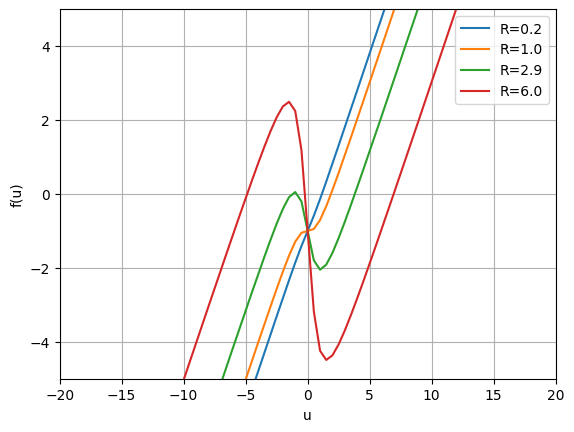

In [56]:
def dim(u, h, R):
    return u - h - (u*R) / (np.sqrt(1 + u**2))


R_vals = [0.2, 1, 2.9, 6]
u = np.arange(-50, 50, 0.5)
h = 1

for R in R_vals:
    plt.plot(u,dim(u, h, R), label = f"R={R:.1f}")
plt.ylabel("f(u)")
plt.xlabel("u")
plt.grid()
plt.legend()
plt.ylim(-5,5)
plt.xlim(-20,20)
plt.show()

Fixing h = 1, we notice that for $R < R_c$, we have 1 root only. We then hit $R_c$ which I found (by trying out values) to be 2.9, and we get 2 roots. All the curves corresponding to $R>2.9$ return 3 roots.

d.) We define r = R - 1, and study the equilibrium equation for small values of r,h,and u.
$$(u - h){\sqrt{1 + u^2}} = u(r+1)$$
Since $u^2 <<1$, we use the binomial expansion in the square root term, getting
$$(u - h)(1 + \frac{1}{2}u^2) = u(r+1)$$
$$u - h  + \frac{1}{2}u^3 - h\frac{1}{2}u^2= ur + u$$
But we assumed that h and u are very small, hence we can take $hu^2$ to be negligible. We finally get

$$h + ru - \frac{1}{2} u^3 \approx 0$$

e.) A saddle-node bifurcation is described by this canonical form 
$$\dot x = r + x^2$$
And one could find the roots by setting it to 0.<br>
To transform the above equilirbrium equation we got in the limit of small r,h and u to a similiar form, we differentiate it with respect to u to reduce its order
$$\frac{d}{du}(h + ru - \frac{1}{2} u^3 ) = r - \frac{3}{2} u^2 = 0$$
Setting it to 0, we find the roots to be
$$u^* = \pm \sqrt{\frac{2}{3}r}$$

f.) We go back to our original dimensionless equation
$$1 - \frac{h}{u} - \frac{R}{\sqrt{1 + u^2}} = 0$$
And apply the same argument by differentiating it with respect to u.
$$\frac{d}{du}(1 - \frac{h}{u} - \frac{R}{\sqrt{1 + u^2}}) = \frac{h}{u^2} + \frac{Ru}{(1+u^2)^{\frac{3}{2}}} = 0$$
$$\frac{h}{u^3} = - \frac{R}{(1+u^2)^{\frac{3}{2}}}$$
$$R = - \frac{h}{u^3}(1+u^2)^{\frac{3}{2}}$$
Replacing this value of R in the original equation,
$$1 - \frac{h}{u} = \frac{- \frac{h}{u^3}(1+u^2)^{\frac{3}{2}}}{\sqrt{1 + u^2}}$$
$$1 - \frac{h}{u} = - \frac{h}{u^3}(1+u^2)$$
Finally getting $h = - u^3$. Replacing in the R expression, we get $R =(1+u^2)^{\frac{3}{2}}$.

g.) From the previous part, we have
$$h(u) = - u^3$$
$$r(u) = (1+u^2)^{\frac{3}{2}} - 1$$
We plot h as function of r

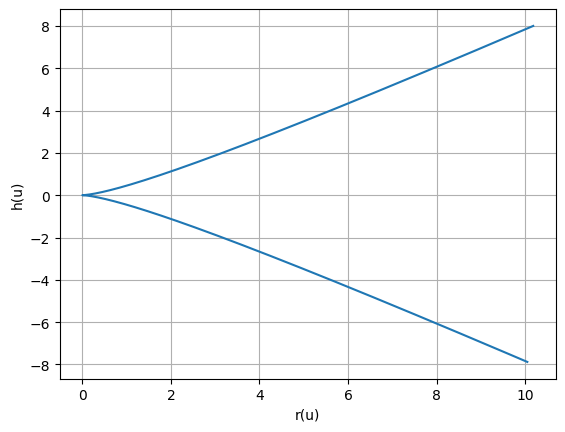

In [4]:
def h(u):
    return - u**3
def r(u):
    return (1+u**2)**(3/2) - 1
u = np.arange(-2, 2, 0.01)

plt.plot(r(u), h(u))
plt.ylabel("h(u)")
plt.xlabel("r(u)")
plt.grid()
plt.show()

The plot represents 2 bifurcation curves that meet tangentially at the crusp (r, h) = (0,0). The crusp is indication of a catastrophe taking place in higher dimension.

h.) We express the h and r values in terms of the dimensional variables by going from u to $\frac{x}{a}$.
$$h(x) = - \left(\frac{x}{a}\right)^3 = \frac{mg \sin \theta}{ka}$$
$$r(x) = \left(1+\left(\frac{x}{a}\right)^2\right)^{\frac{3}{2}} - 1= \frac{L_0}{a} - 1$$